### Introduction

 This project involves analyzing real-world medical appointment data through time series analysis.This dataset contain some 
columns like Gender, ScheduledDay,AppointmentDay,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show.My task include
dataset cleaning,comprehensive analysis and extracting insights using Python and SQL.

In [1]:
# importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
ds=pd.read_csv('Hospital_patients_datasets.csv')

In [4]:
# see first 5 rows of the dataset
ds.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# see last 5 rows of the dataset
ds.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
# Shape
ds.shape

(110527, 14)

In this dataset have 110527 rows and 14 columns

In [6]:
ds.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
ds["Gender"].unique()

array(['F', 'M'], dtype=object)

In [8]:
# The number of duplicated rows found in the DataFrame.
ds.duplicated().sum()

0

In [9]:
# DataFrame with certain column names changed to new names.
ds.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSRecevied','No-show':'NoShow'},inplace=True)

In [10]:
#  DataFrame with 'ScheduledDay' and 'AppointmentDay' columns converted to datetime objects.
ds['ScheduledDay'] =pd.to_datetime(ds['ScheduledDay']).dt.date.astype('datetime64[ns]')
ds['AppointmentDay'] =pd.to_datetime(ds['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSRecevied     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [12]:
# count of null values for each column in the DataFrame
ds.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSRecevied       0
NoShow            0
dtype: int64

In [13]:
# drop unnecessary columns from the DataFrame
ds.drop(['PatientId', 'AppointmentID','Neighbourhood'],axis=1,inplace=True)

In [14]:
#First Drop rows with Age == 0
ds=ds[ds['Age'] !=0]

In [15]:
# Generating labels for age intervals (e.g., '1 - 20', '21 - 40', etc.)
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

In [16]:
# Using the pd.cut() function to categorize ages into groups(use bins = range(1, 130, 20) ,right=False and use the given labels)
ds['Age_group']=pd.cut(ds['Age'],bins=range(1,130,20),labels=labels,right=False)

In [17]:
ds.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow,Age_group
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,61 - 81
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,41 - 61
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,61 - 81
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,1 - 21
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,41 - 61


In [18]:
# convert 'NoShow' values into binary values (1 for 'Yes' and 0 for 'No').
ds['NoShow']=ds['NoShow'].replace(['Yes','No'],[1,0])

In [19]:
# save this cleaned data and give the name patients
ds.to_csv('patients.csv',index=False)

In [21]:
# write your code to export the cleaned dataset 
df=pd.read_csv("patients (1).csv")

In [22]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,0,41 - 61


In [23]:
df["SMSRecevied"].unique()

array([0, 1], dtype=int64)

In [24]:
df.describe()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow
count,106988.00000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000
mean,0.10103,0.203771,0.074242,0.031405,0.022975,0.323261,0.202640
std,0.30137,0.402802,0.262165,0.174412,0.164114,0.467723,0.401968
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106988 entries, 0 to 106987
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          106988 non-null  object
 1   ScheduledDay    106988 non-null  object
 2   AppointmentDay  106988 non-null  object
 3   Scholarship     106988 non-null  int64 
 4   Hypertension    106988 non-null  int64 
 5   Diabetes        106988 non-null  int64 
 6   Alcoholism      106988 non-null  int64 
 7   Handicap        106988 non-null  int64 
 8   SMSRecevied     106988 non-null  int64 
 9   NoShow          106988 non-null  int64 
 10  Age_group       106987 non-null  object
dtypes: int64(7), object(4)
memory usage: 9.0+ MB


In [26]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSRecevied       0
NoShow            0
Age_group         1
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSRecevied',
       'NoShow', 'Age_group'],
      dtype='object')

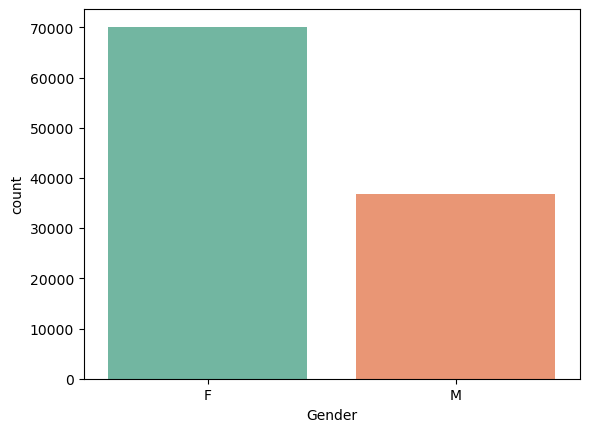

In [44]:
# see the patients gender
sns.countplot(x='Gender',data=df,palette='Set2')
plt.show()

most of the patients are Female.

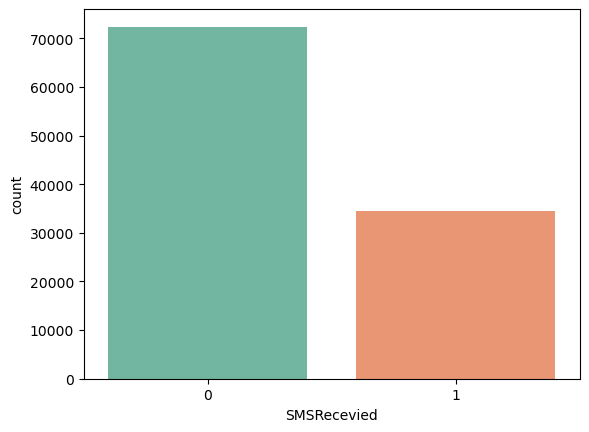

In [34]:
sns.countplot(x='SMSRecevied',data=df,palette='Set2')
plt.show()

see very less number of patients are recevied their SMS.Most number of patients are not getting sms it might be any technical issue or clinic don't massage them.

### Are SMS reminders effective in reducing no-shows? Should the clinic invest more in this practice?

<Axes: xlabel='SMSRecevied', ylabel='count'>

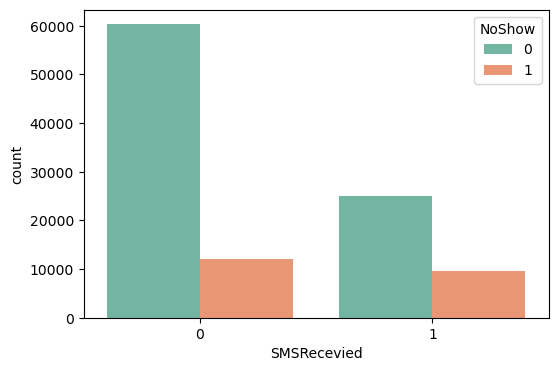

In [30]:
# see the relation between smsrecevied and no show
plt.figure(figsize=(6, 4)) 
sns.countplot(x='SMSRecevied', hue='NoShow', data=df, palette='Set2')

see which who's getting sms and which patients don't get sms both the cases patients come to doctor. so not needed to invest more 
on give sms to everyone.

In [32]:
# Convert columns to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [33]:
# Calculate waiting time
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

<Axes: xlabel='WaitingTime', ylabel='Count'>

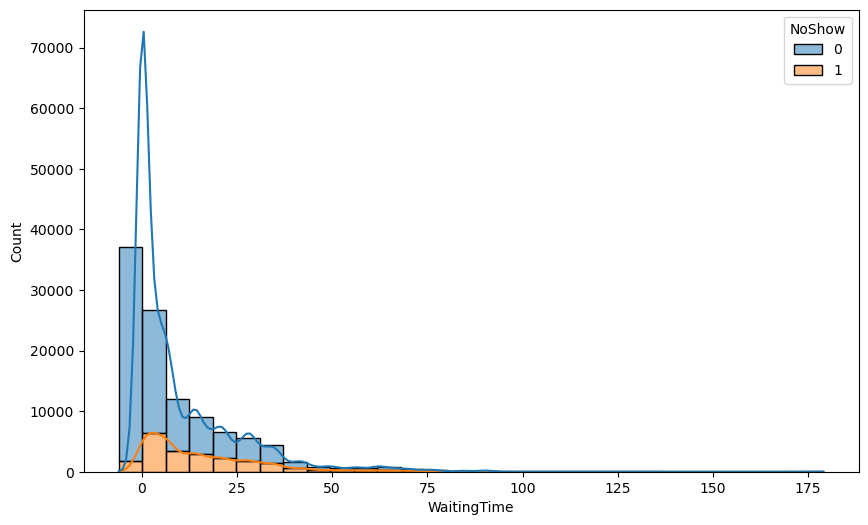

In [40]:
# Create a histogram to visualize waiting times
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df, x='WaitingTime', hue='NoShow', multiple='stack', bins=30, kde=True)

see most of the cases the patients get chance that day or 1,2,3 days and some cases the patients waiting period goes to 5 to 25 days

<Axes: xlabel='Age_group', ylabel='count'>

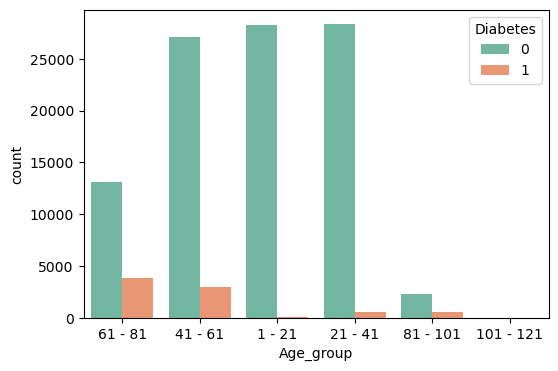

In [36]:
# see which age group patients have diabetes 
plt.figure(figsize=(6, 4))  # Set the figure size
sns.countplot(x='Age_group', hue='Diabetes', data=df, palette='Set2')

see diabetes start from 21 to 41 age group and this diabetes is high in the age group 61 to 81.

<Axes: xlabel='Age_group', ylabel='count'>

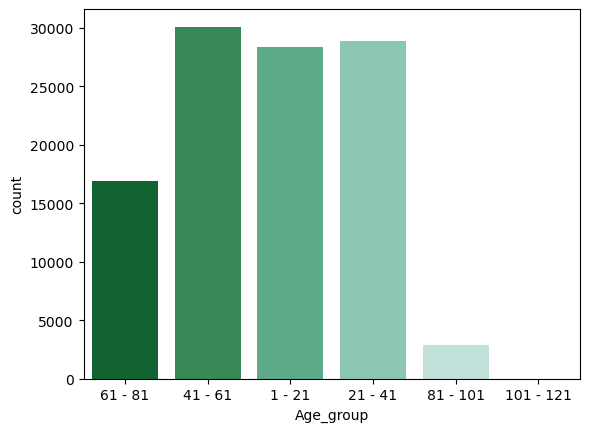

In [37]:
# see the age group distribution which age group patients come to doctor
sns.countplot(x='Age_group',data=df,palette='BuGn_r')

most of the patients come to doctor their age lies between 1 to 61 years,yes some of the patients age is between 61 to 81.

<Axes: xlabel='Age_group', ylabel='count'>

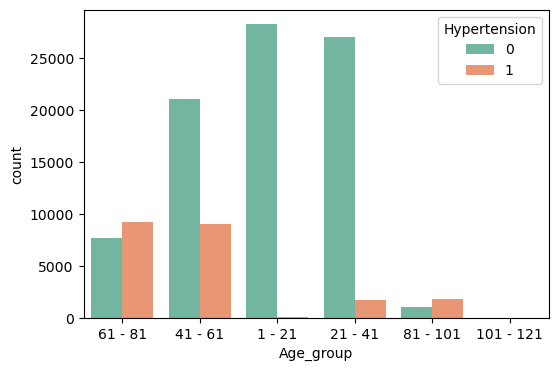

In [52]:
plt.figure(figsize=(6, 4))  
sns.countplot(x='Age_group', hue='Hypertension', data=df, palette='Set2')

see people's age between 1 to 41 they are not facing hypertention problem but but age group between 41 to 81 they are facing hypertention problem.